# DNA Data Science Assessment - Random Forest Classification

In [1]:
import pandas as pd
import numpy as np
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [2]:
# Load prepped data
X_train,y_train,X_train_balanced,y_train_balanced,X_train_over,y_train_over,X_test,y_test = pickle.load(open('prepped_data.pkl','rb'))

## Random Forest Classifier

In [3]:
# Create Random Forest Classifier, and train on data before balancing
clf = RandomForestClassifier(n_estimators=100) # start with 100 estimators

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [4]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9661111111111111


In [5]:
metrics.confusion_matrix(y_test,y_pred)

array([[1531,   30],
       [  31,  208]])

In [22]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1561
           1       0.87      0.87      0.87       239

    accuracy                           0.97      1800
   macro avg       0.93      0.93      0.93      1800
weighted avg       0.97      0.97      0.97      1800



## Random Forest Classifier with Balanced Undersampled Training Data

In [9]:
# Create Random Forest Classifier
clf_bal=RandomForestClassifier(n_estimators=100)

clf_bal.fit(X_train_balanced,y_train_balanced)

y_pred_bal=clf_bal.predict(X_test)

In [10]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_bal))

Accuracy: 0.9572222222222222


In [11]:
metrics.confusion_matrix(y_test,y_pred_bal)

array([[1490,   71],
       [   6,  233]])

In [21]:
print(metrics.classification_report(y_test, y_pred_bal))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1561
           1       0.77      0.97      0.86       239

    accuracy                           0.96      1800
   macro avg       0.88      0.96      0.92      1800
weighted avg       0.97      0.96      0.96      1800



## Random Forest Classifier with Balanced Oversampled Training Data

In [12]:
# Create Random Forest Classifier
clf_over=RandomForestClassifier(n_estimators=100)

clf_over.fit(X_train_over,y_train_over)

y_pred_over=clf_over.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_over))

Accuracy: 0.9622222222222222


In [13]:
metrics.confusion_matrix(y_test,y_pred_over)

array([[1529,   32],
       [  36,  203]])

In [23]:
print(metrics.classification_report(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1561
           1       0.86      0.85      0.86       239

    accuracy                           0.96      1800
   macro avg       0.92      0.91      0.92      1800
weighted avg       0.96      0.96      0.96      1800



## Retrain RF with Select Features

In [31]:
# Go with under sampled classifier
feature_imp = pd.Series(clf_bal.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp.values

array([0.31273957, 0.15351308, 0.12905097, 0.1217558 , 0.08512202,
       0.0656712 , 0.06295777, 0.02809007, 0.01193176, 0.011434  ,
       0.00813801, 0.00465815, 0.00400812, 0.00092946])

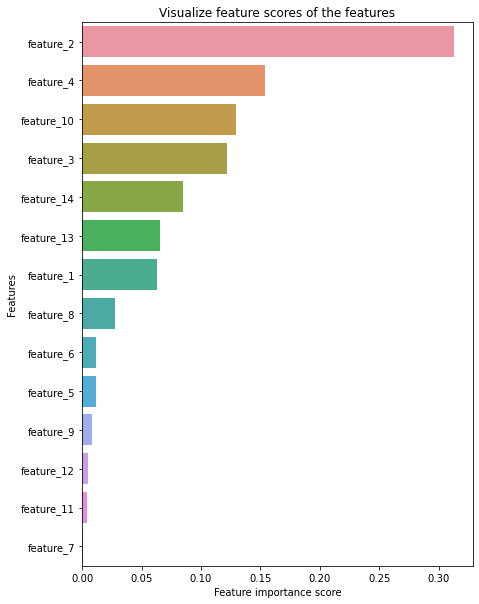

In [32]:
f, ax = plt.subplots(figsize=(7, 10))
ax = sns.barplot(x=feature_imp.values, y=feature_imp.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_imp.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [35]:
# Pickle feature names
pickle.dump(feature_imp.index[0:10].values,open('top_ten_features.pkl', 'wb'))

In [36]:
# Rerun Random Forest model with fewer features
select = feature_imp.index[0:10] # select the first 10 features
X_train_sel = X_train_balanced[select] # get training dataframe with fewer columns
X_test_sel = X_test[select] # get test dataframe with fewer columns

clf_sel=RandomForestClassifier(n_estimators=100) 
clf_sel.fit(X_train_sel,y_train_balanced)
y_pred_sel=clf_sel.predict(X_test_sel)

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_sel))

Accuracy: 0.9522222222222222


In [38]:
print(metrics.classification_report(y_test, y_pred_sel))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1561
           1       0.74      0.98      0.84       239

    accuracy                           0.95      1800
   macro avg       0.87      0.96      0.91      1800
weighted avg       0.96      0.95      0.95      1800



In [39]:
metrics.confusion_matrix(y_test,y_pred_sel)

array([[1480,   81],
       [   5,  234]])

In [40]:
# save DTC model
pickle.dump(clf_sel, open('rfm_10_features.pkl', 'wb'))